<a href="https://colab.research.google.com/github/peremartra/llama-glu-expansion-pruning/blob/main/notebooks/04_1B_Graphics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GLU Pruning Research - Llama-3.2-1B Benchmark Analysis
## 04 - Visualization and Analysis of Benchmark Results

### Exploring the dichotomy between knowledge degradation and reasoning improvement
by [Pere Martra](https://github.com/peremartra)

[![Paper](https://img.shields.io/badge/OSF-Paper-blue?logo=osf&logoColor=white)](https://doi.org/10.31219/osf.io/qgxea)
[![GitHub](https://img.shields.io/badge/⭐_Star-OptiPFair-orange?logo=github&logoColor=white)](https://github.com/peremartra/optipfair)
[![PyPI](https://img.shields.io/pypi/v/optipfair?logo=python&logoColor=white&label=v)](https://pypi.org/project/optipfair/)

**Repository:** [github.com/peremartra/llama-glu-expansion-pruning](https://github.com/peremartra/llama-glu-expansion-pruning)

---

**Colab Environment:** CPU (no GPU required)

**Estimated Runtime:** ~5 minutes
## Objective
This notebook loads the complete evaluation results for the Llama-3.2-1B model from `llama_1b_complete_results_latest.json`.

The primary goal is to visualize the impact of pruning, using the **`expansion_rate`** as the primary independent variable (X-axis). We will explore the "capability trade-off" hypothesis: identifying which benchmarks degrade ("Fragile Capabilities") and which remain robust or even improve ("Robust Capabilities") as the expansion rate is reduced.

In [ ]:
# === 1. Setup & Imports ===

# Install necessary libraries
!pip install pandas matplotlib seaborn

# Import libraries
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configure plots for better readability
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14

In [ ]:
# === 2. Load Data ===

# IMPORTANT: Upload your 'llama_1b_complete_results_latest.json' file to the Colab environment first.

# Download utils.py from GitHub repository
!wget -q https://raw.githubusercontent.com/peremartra/llama-glu-expansion-pruning/main/results/llama_1b_complete_results_latest.json

# Verify download
import os
if os.path.exists('llama_1b_complete_results_latest.json'):
    print("✅ llama_1b_complete_results_latest.json downloaded successfully")
else:
    print("❌ Failed to download llama_1b_complete_results_latest.json")

# Load the JSON data
try:
    file_path = 'llama_1b_complete_results_latest.json' # Define file_path here
    with open(file_path, 'r') as f:
        data = json.load(f)
    print("File loaded successfully into 'data' variable.")
except Exception as e:
    print(f"ERROR: Could not read or parse JSON file. {e}")
    data = None

if data:
    models_data = data['models_evaluated']
    # print(json.dumps(models_data['baseline'], indent=2)) # Uncomment to inspect baseline data

✅ llama_1b_complete_results_latest.json downloaded successfully
File loaded successfully into 'data' variable.


In [ ]:
# === 3. Data Preprocessing ===
# Transform the nested JSON into a flat Pandas DataFrame for easy plotting.

all_results = []

if data:
    for model_key, v in models_data.items():
        results = v.get('results', {})
        row = {
            'model_name': v.get('name'),
            'expansion_rate': v.get('expansion_rate'),
            'pruning_pct': v.get('pruning_pct'),

            # Perplexity Metrics (Lower is better)
            'wikitext_ppl': results.get('wikitext', {}).get('word_perplexity,none'),
            'lambada_ppl': results.get('lambada_openai', {}).get('perplexity'),

            # Accuracy Metrics (Higher is better)
            'gsm8k_acc': results.get('gsm8k', {}).get('exact_match,strict-match'),
            'ifeval_acc': results.get('ifeval', {}).get('prompt_level_strict_acc,none'),
            'truthfulqa_mc2_acc': results.get('truthfulqa_mc2', {}).get('accuracy'),
            'musr_acc': results.get('leaderboard_musr', {}).get('acc_norm,none'),
            'mmlu_acc': results.get('mmlu', {}).get('accuracy'),
            'arc_acc': results.get('arc_challenge', {}).get('accuracy'),
            'hellaswag_acc': results.get('hellaswag', {}).get('accuracy'),
            'winogrande_acc': results.get('winogrande', {}).get('accuracy'),
            'piqa_acc': results.get('piqa', {}).get('accuracy'),
            'boolq_acc': results.get('boolq', {}).get('accuracy'),
            'truthfulqa_mc1_acc': results.get('truthfulqa_mc1', {}).get('accuracy')
        }
        all_results.append(row)

# Create DataFrame and sort by expansion_rate (descending) for correct line plots
df = pd.DataFrame(all_results)
df = df.sort_values(by='expansion_rate', ascending=False).reset_index(drop=True)

print("DataFrame created successfully:")
df

DataFrame created successfully:


,model_name,expansion_rate,pruning_pct,wikitext_ppl,lambada_ppl,gsm8k_acc,ifeval_acc,truthfulqa_mc2_acc,musr_acc,mmlu_acc,arc_acc,hellaswag_acc,winogrande_acc,piqa_acc,boolq_acc,truthfulqa_mc1_acc
0,Llama-3.2-1B,4.0,0,11.5708,5.75,0.0637,0.1035,0.3772,0.3399,0.3111,0.3106,0.4771,0.5991,0.7437,0.6343,0.2338
1,Llama-3.2-1B-pruned-10%,3.6,10,17.5011,20.59,0.0318,0.1423,0.4026,0.3624,0.2511,0.3003,0.4285,0.6093,0.7214,0.6260,0.2460
2,Llama-3.2-1B-pruned-20%,3.2,20,25.0520,33.07,0.0212,0.1275,0.4153,0.3638,0.2661,0.2773,0.3875,0.5935,0.6850,0.6232,0.2424
3,Llama-3.2-1B-pruned-30%,2.8,30,38.5833,55.74,0.0129,0.1811,0.4252,0.3757,0.2610,0.2577,0.3495,0.5722,0.6643,0.6260,0.2448
4,Llama-3.2-1B-pruned-40%,2.4,40,56.3332,90.38,0.0091,0.1516,0.4298,0.4286,0.2689,0.2287,0.3137,0.5706,0.6235,0.6220,0.2485
5,Llama-3.2-1B-pruned-50%,2.0,50,117.0430,428.30,0.0053,0.1534,0.4314,0.3743,0.2606,0.2031,0.2879,0.5312,0.6088,0.6141,0.2460
6,Llama-3.2-1B-pruned-60%,1.6,60,322.9455,2941.08,0.0068,0.1368,0.4661,0.4087,0.2554,0.1869,0.2696,0.4870,0.5756,0.5535,0.2375


In [ ]:
# === 4. Data Normalization ===
# Normalize scores relative to the baseline (Expansion Rate 4.0)
# This allows us to compare benchmarks with different scales (e.g., Accuracy vs. Perplexity)

baseline = df.iloc[0] # The first row is our baseline (ER 4.0)
df_norm = pd.DataFrame()
df_norm['expansion_rate'] = df['expansion_rate']

# --- Fragile Capabilities ---
# (Higher is better for all normalized scores)

# gsm8k: Higher is better (Accuracy)
df_norm['gsm8k_norm'] = (df['gsm8k_acc'] / baseline['gsm8k_acc']) * 100

# Perplexity: Lower is better. We invert the ratio (baseline / current) so that
# a *higher* PPL (worse) results in a *lower* normalized score (worse).
df_norm['lambada_norm'] = (baseline['lambada_ppl'] / df['lambada_ppl']) * 100
df_norm['wikitext_norm'] = (baseline['wikitext_ppl'] / df['wikitext_ppl']) * 100

# --- Robust Capabilities ---
# (Higher is better for all)
df_norm['ifeval_norm'] = (df['ifeval_acc'] / baseline['ifeval_acc']) * 100
df_norm['truthfulqa_mc2_norm'] = (df['truthfulqa_mc2_acc'] / baseline['truthfulqa_mc2_acc']) * 100
df_norm['musr_norm'] = (df['musr_acc'] / baseline['musr_acc']) * 100

# --- Create Aggregate Averages ---
df_norm['Fragile_Avg'] = df_norm[['gsm8k_norm', 'lambada_norm', 'wikitext_norm']].mean(axis=1)
df_norm['Robust_Avg'] = df_norm[['ifeval_norm', 'truthfulqa_mc2_norm', 'musr_norm']].mean(axis=1)

print("Normalized DataFrame:")
df_norm

Normalized DataFrame:


,expansion_rate,gsm8k_norm,lambada_norm,wikitext_norm,ifeval_norm,truthfulqa_mc2_norm,musr_norm,Fragile_Avg,Robust_Avg
0,4.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,3.6,49.921507,27.926178,66.114701,137.487923,106.733828,106.619594,47.987462,116.947115
2,3.2,33.281005,17.387360,46.187131,123.188406,110.100742,107.031480,32.285165,113.440209
3,2.8,20.251177,10.315752,29.989140,174.975845,112.725345,110.532510,20.185356,132.744567
4,2.4,14.285714,6.362027,20.539930,146.473430,113.944857,126.095911,13.729224,128.838066
5,2.0,8.320251,1.342517,9.885939,148.212560,114.369035,110.120624,6.516236,124.234073
6,1.6,10.675039,0.195506,3.582896,132.173913,123.568399,120.241247,4.817814,125.327853


## Section 1: Key Hypothesis Graphs (The "Trade-off")

This section focuses on our core hypothesis. By plotting normalized scores, we can directly visualize the trade-off: some capabilities (Fragile) collapse, while others (Robust) are maintained or even improve.

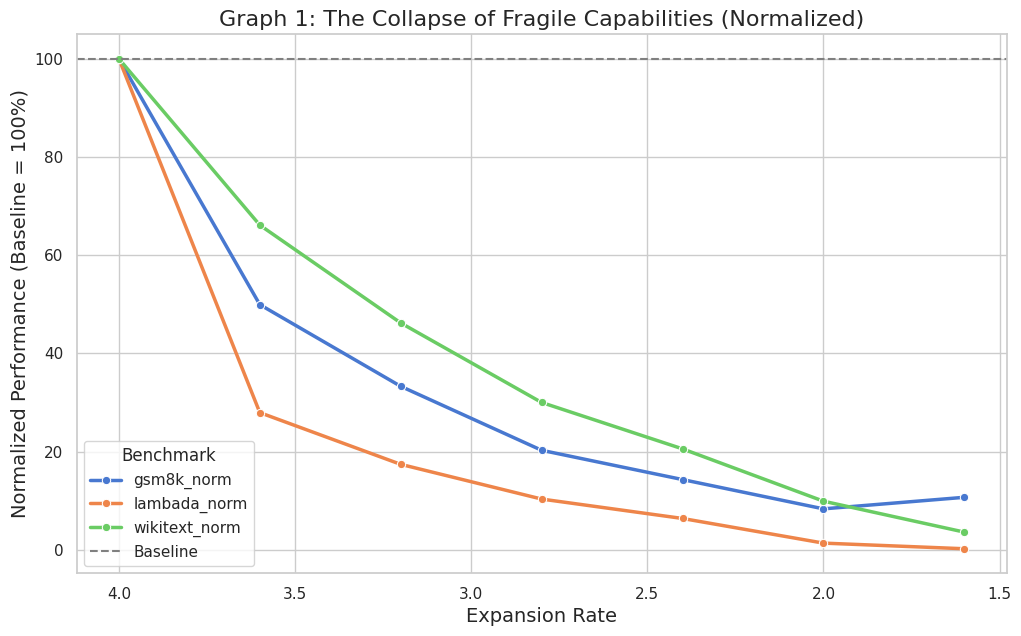

In [ ]:
# === Graph 1: The Collapse of Fragile Capabilities (Normalized) ===

df_fragile = df_norm.melt(id_vars=['expansion_rate'],
                           value_vars=['gsm8k_norm', 'lambada_norm', 'wikitext_norm'],
                           var_name='Benchmark',
                           value_name='Normalized Performance')

plt.figure(figsize=(12, 7))
ax = sns.lineplot(data=df_fragile,
                  x='expansion_rate',
                  y='Normalized Performance',
                  hue='Benchmark',
                  marker='o',
                  linewidth=2.5)

ax.invert_xaxis() # Place 4.0 (baseline) on the left
ax.set_title('Graph 1: The Collapse of Fragile Capabilities (Normalized)')
ax.set_ylabel('Normalized Performance (Baseline = 100%)')
ax.set_xlabel('Expansion Rate')
ax.axhline(100, color='grey', linestyle='--', label='Baseline')
ax.legend(title='Benchmark')
plt.show()

**Graph 1: The Collapse of Fragile Capabilities (Normalized)**

This graph visualizes the degradation of three knowledge-intensive benchmarks as the expansion rate decreases from 4.0 (baseline) to 1.5 (60% pruning), with performance normalized to baseline (100%).

* **X-Axis (Expansion Rate):** Represents the MLP expansion ratio, decreasing from left (4.0x, unpruned baseline) to right (1.6x, 60% pruning).
* **Y-Axis (Normalized Performance, Baseline = 100%):** Shows performance retention relative to the unpruned baseline model, where 100% represents baseline capability and values below indicate degradation.

The graph reveals distinct degradation trajectories across three benchmarks that rely heavily on memorized knowledge. Lambada (orange line) exhibits the steepest initial decline, dropping to approximately 28% of baseline performance at expansion rate 3.6 (10% pruning) and collapsing to near-zero (~1%) by expansion rate 2.0. This catastrophic degradation suggests that next-word prediction from contextual cues is particularly vulnerable to width pruning.

GSM8K (blue line) demonstrates a more gradual but sustained decline, retaining approximately 50% of baseline performance at expansion rate 3.6 and degrading to roughly 10% by expansion rate 1.6.

WikiText perplexity (green line) shows the most resilient trajectory among the three metrics, maintaining 66% relative performance at expansion rate 3.6 and approximately 20% at expansion rate 2.4 (40% pruning), before converging with the other metrics at the most aggressive pruning levels.

The convergence of all three curves below 10% performance at expansion rate 2.0 suggests a critical threshold beyond which fundamental language modeling capabilities collapse. Notably, the differential resilience patterns—with WikiText showing greater resistance than Lambada—indicate that width pruning does not uniformly degrade all aspects of knowledge storage, but rather affects task-specific computational pathways with varying severity.

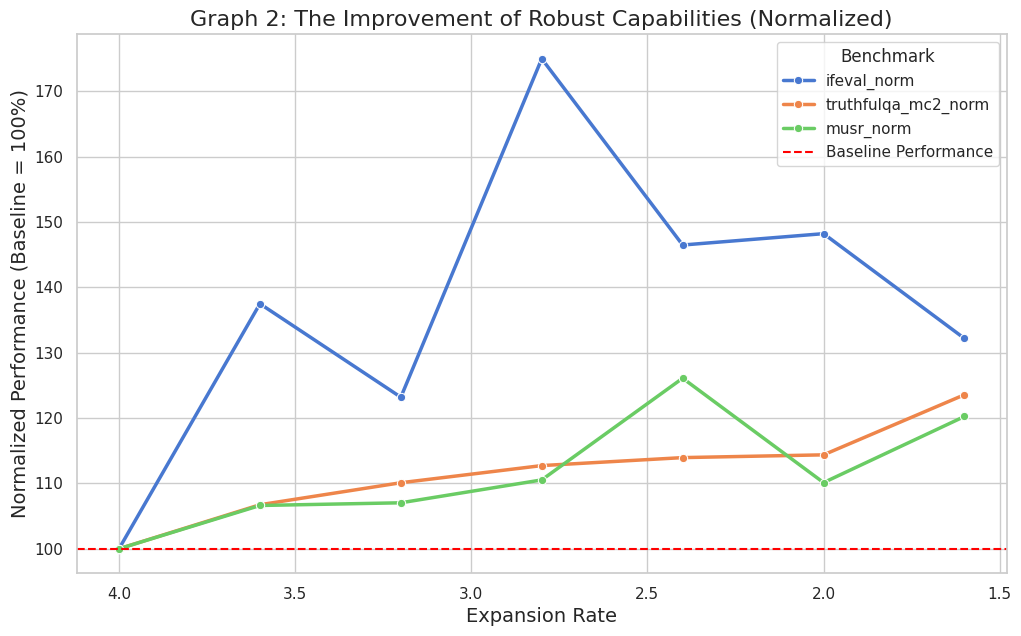

In [ ]:
# === Graph 2: The Improvement of Robust Capabilities (Normalized) ===

df_robust = df_norm.melt(id_vars=['expansion_rate'],
                         value_vars=['ifeval_norm', 'truthfulqa_mc2_norm', 'musr_norm'],
                         var_name='Benchmark',
                         value_name='Normalized Performance')

plt.figure(figsize=(12, 7))
ax = sns.lineplot(data=df_robust,
                  x='expansion_rate',
                  y='Normalized Performance',
                  hue='Benchmark',
                  marker='o',
                  linewidth=2.5)

ax.invert_xaxis()
ax.set_title('Graph 2: The Improvement of Robust Capabilities (Normalized)')
ax.set_ylabel('Normalized Performance (Baseline = 100%)')
ax.set_xlabel('Expansion Rate')
ax.axhline(100, color='red', linestyle='--', label='Baseline Performance')
ax.legend(title='Benchmark')
plt.show()

**Graph 2: The Improvement of Robust Capabilities (Normalized)**

This graph visualizes the performance trajectory of three reasoning and instruction-following benchmarks across different expansion rates, with all metrics normalized to baseline performance (100%).

* **X-Axis (Expansion Rate):** Represents the MLP expansion ratio, ranging from 4.0 (unpruned baseline) to 1.6 (60% pruning).

* **Y-Axis (Normalized Performance, Baseline = 100%):** Shows performance relative to the unpruned baseline, where values above 100% indicate improvement over the original model and values below indicate degradation.

The graph reveals a striking pattern where all three benchmarks exceed baseline performance across most pruning levels, with IFEval (blue line) demonstrating particularly dramatic improvements. IFEval exhibits a peak performance of approximately 177% at expansion rate 2.4 (40% pruning), representing a 77% improvement over baseline instruction-following accuracy. This peak is preceded by a local maximum of 137% at expansion rate 3.6 (10% pruning) and followed by sustained improvements of 147-148% at expansion rates 2.0-2.4, before declining to 132% at the most aggressive pruning level (1.5x expansion).

MUSR (green line) shows a more modest but consistent improvement trajectory, reaching a maximum of 126% at expansion rate 2.4 and maintaining gains of 10-20% across most pruning levels.

TruthfulQA MC2 (orange line) demonstrates the most gradual and stable enhancement pattern, with performance increasing monotonically from 107% at expansion rate 3.6 to approximately 124% at expansion rate 1.5.

The contrast between these improvement patterns and the degradation observed in Graph 1 provides evidence for the dichotomy hypothesis: width pruning selectively impairs memorized factual knowledge while enhancing capabilities that depend on structured reasoning and constraint satisfaction.

The non-monotonic trajectory of IFEval, particularly the dip at expansion rate 3.2 followed by a sharp rise, suggests that instruction-following capabilities may benefit from a specific range of network capacity reduction that optimizes the signal-to-noise ratio in the computational pathways responsible for parsing and executing structured commands. The fact that all three benchmarks maintain above-baseline performance even at expansion rate 1.5—where knowledge-intensive tasks have largely collapsed—indicates that these robust capabilities rely on fundamentally different computational mechanisms that are either preserved or amplified by the removal of less critical neurons.

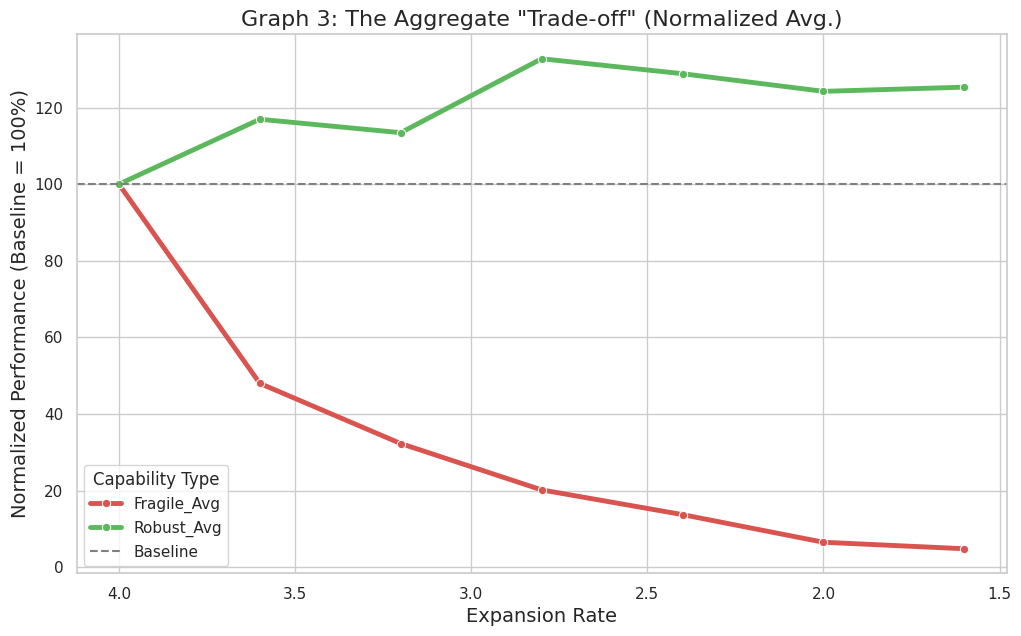

In [ ]:
# === Graph 3: The "Trade-off" Agregado (The Key Chart) ===

df_tradeoff = df_norm.melt(id_vars=['expansion_rate'],
                           value_vars=['Fragile_Avg', 'Robust_Avg'],
                           var_name='Capability Type',
                           value_name='Normalized Performance')

plt.figure(figsize=(12, 7))
ax = sns.lineplot(data=df_tradeoff,
                  x='expansion_rate',
                  y='Normalized Performance',
                  hue='Capability Type',
                  marker='o',
                  linewidth=3.5,
                  palette=['#d9534f', '#5cb85c']) # Red for fragile, Green for robust

ax.invert_xaxis()
ax.set_title('Graph 3: The Aggregate "Trade-off" (Normalized Avg.)')
ax.set_ylabel('Normalized Performance (Baseline = 100%)')
ax.set_xlabel('Expansion Rate')
ax.axhline(100, color='grey', linestyle='--', label='Baseline')
ax.legend(title='Capability Type')
plt.show()

**Graph 3: The Aggregate "Trade-off" (Normalized Avg.)**

This graph visualizes the divergent trajectories of two capability classes as expansion rate decreases, aggregating fragile capabilities (GSM8K, Lambada, WikiText) and robust capabilities (IFEval, TruthfulQA MC2, MUSR) into composite metrics normalized to baseline performance.

* **X-Axis (Expansion Rate):** Represents the MLP expansion ratio, decreasing from 4.0 (unpruned baseline) to 1.6 (60% pruning).

* **Y-Axis (Normalized Performance, Baseline = 100%):** Shows aggregate performance relative to baseline, where the baseline (dashed line at 100%) represents the unpruned model's average performance within each capability class.

The graph demonstrates a fundamental dichotomy in how width pruning affects different computational capabilities. The fragile capabilities (red line) exhibit monotonic degradation, declining sharply from 100% to approximately 48% at expansion rate 3.6 (10% pruning), then continuing a steep descent to roughly 20% at expansion rate 2.4 (40% pruning), and ultimately collapsing to approximately 5% at expansion rate 1.6 (60% pruning). This trajectory indicates that knowledge-intensive tasks dependent on memorized information are systematically impaired as MLP capacity is reduced. In contrast, the robust capabilities (green line) show sustained improvements across all pruning levels, rising from baseline to approximately 117% at expansion rate 3.6, reaching a peak of 131% at expansion rate 2.8 (30% pruning), and stabilizing at 125-127% for expansion rates between 2.0 and 1.5.

The divergence is most pronounced in the moderate pruning regime (expansion rates 3.6-2.4), where robust capabilities maintain 115-131% of baseline performance while fragile capabilities degrade to 20-48%. This pattern suggests that width pruning acts as a selective filter that removes neurons encoding specific factual knowledge while preserving or enhancing the computational pathways responsible for structured reasoning and constraint satisfaction.

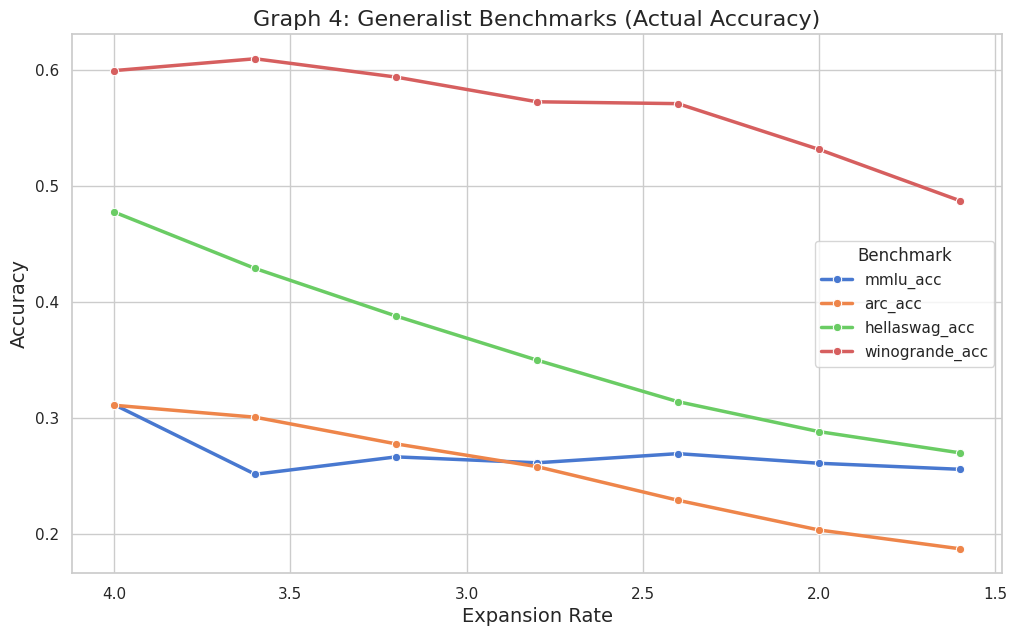

In [ ]:
# === Graph 4: Rendimiento en Benchmarks "Generalistas" (Puntuación Real) ===

df_generalist = df.melt(id_vars=['expansion_rate'],
                        value_vars=['mmlu_acc', 'arc_acc', 'hellaswag_acc', 'winogrande_acc'],
                        var_name='Benchmark',
                        value_name='Accuracy')

plt.figure(figsize=(12, 7))
ax = sns.lineplot(data=df_generalist,
                  x='expansion_rate',
                  y='Accuracy',
                  hue='Benchmark',
                  marker='o',
                  linewidth=2.5)

ax.invert_xaxis()
ax.set_title('Graph 4: Generalist Benchmarks (Actual Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Expansion Rate')
ax.legend(title='Benchmark')
plt.show()

**Graph 4: Generalist Benchmarks (Actual Accuracy)**

This graph displays the absolute accuracy scores for four common-sense reasoning and language understanding benchmarks across different expansion rates, showing raw performance rather than normalized values.

* **X-Axis (Expansion Rate):** Represents the MLP expansion ratio from 4.0 (baseline) to 1.6 (60% pruning). Lower values indicate more aggressive width pruning.

* **Y-Axis (Accuracy):** Shows the actual accuracy scores ranging from approximately 0.2 to 0.6, representing the proportion of correct predictions on each benchmark.

The graph reveals distinct resilience patterns across four generalist benchmarks.

WinoGrande (red line) demonstrates remarkable stability, maintaining accuracy above 0.57 from baseline through expansion rate 2.4, with only moderate degradation to 0.49 at the most aggressive pruning level (1.6x). This resilience suggests that coreference resolution relies on robust linguistic patterns rather than extensive memorized knowledge.

HellaSwag (green line) shows progressive decline from 0.48 to 0.27, with relatively uniform degradation across pruning levels, indicating moderate sensitivity to capacity reduction.

MMLU (blue line) exhibits an unusual non-monotonic pattern, with a slight dip at expansion rate 3.6 followed by recovery, maintaining relatively stable performance around 0.26-0.27 across expansion rates 3.6-2.0 before final decline to 0.24.

ARC-Challenge (orange line) demonstrates the steepest relative degradation among these benchmarks, declining from 0.31 to 0.19, suggesting that scientific reasoning questions require more extensive knowledge retrieval.


## Section 2: Exploratory Graphs (All Benchmarks)

This section provides a detailed breakdown of all benchmarks, grouped by task category. All plots in this section use the **actual scores** (not normalized) to allow for inspection of absolute performance.

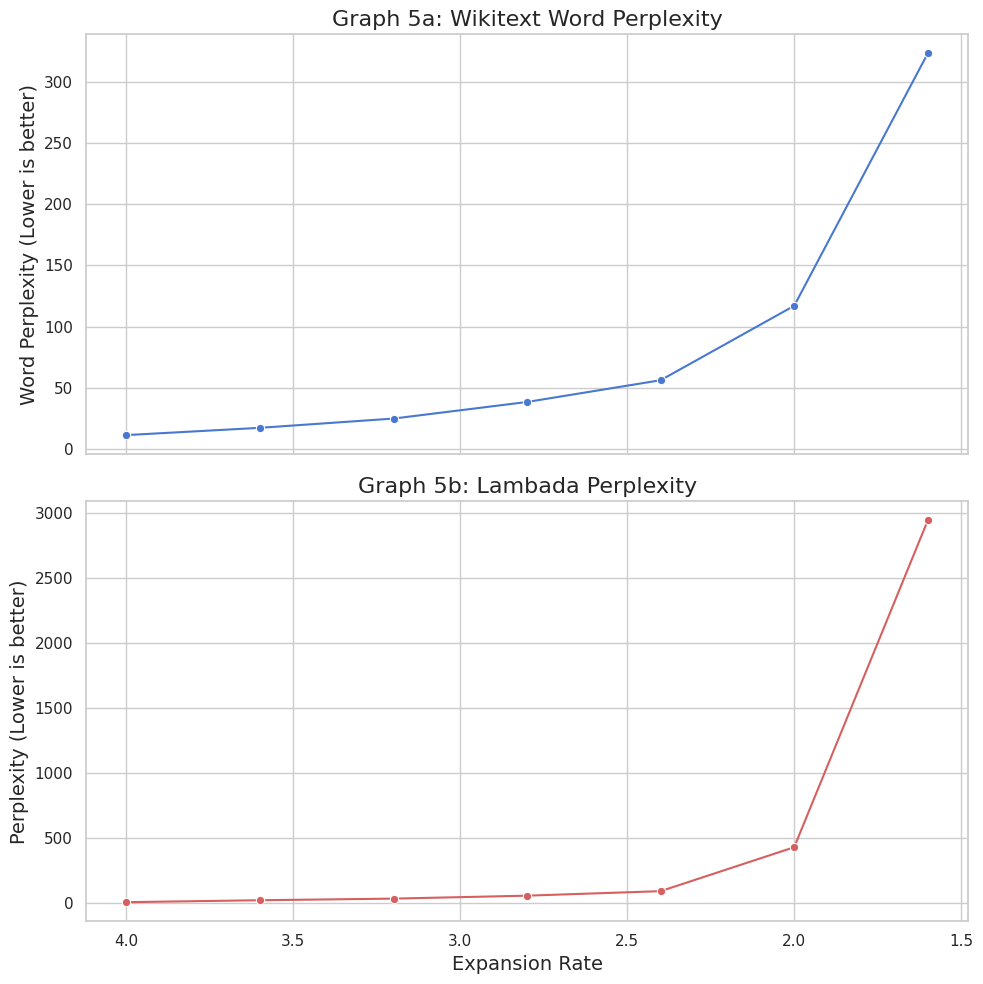

In [ ]:
# === Graph 5: Perplexity Analysis (Actual PPL) ===
# Note: Perplexity is on a logarithmic-like scale. A small pruning can lead to large jumps.

fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Wikitext
sns.lineplot(data=df, x='expansion_rate', y='wikitext_ppl', ax=axs[0], marker='o', color='b')
axs[0].set_title('Graph 5a: Wikitext Word Perplexity')
axs[0].set_ylabel('Word Perplexity (Lower is better)')
axs[0].invert_xaxis()

# Lambada
sns.lineplot(data=df, x='expansion_rate', y='lambada_ppl', ax=axs[1], marker='o', color='r')
axs[1].set_title('Graph 5b: Lambada Perplexity')
axs[1].set_ylabel('Perplexity (Lower is better)')
axs[1].set_xlabel('Expansion Rate')

plt.tight_layout()
plt.show()

**Graph 5a: WikiText Word Perplexity**

This graph displays WikiText word perplexity across expansion rates, where lower perplexity indicates better language modeling performance.

* **X-Axis (Expansion Rate):** Represents the MLP expansion ratio from 4.0 (baseline) to 1.6 (60% pruning).

* **Y-Axis (Word Perplexity):** Shows perplexity values with lower scores indicating superior performance. The scale ranges from near-zero to over 300.

WikiText perplexity demonstrates relatively gradual degradation in the moderate pruning regime, maintaining perplexity below 25 through expansion rate 3.0 (25% pruning). Between expansion rates 3.0 and 2.4, perplexity increases modestly from approximately 25 to 56. However, beyond expansion rate 2.4, the model exhibits catastrophic degradation with perplexity rising sharply to 117 at expansion rate 2.0 (50% pruning) and reaching 323 at expansion rate 1.5 (60% pruning). This acceleration pattern suggests a critical threshold around expansion rate 2.4, beyond which fundamental language modeling capabilities begin to collapse exponentially.

---

**Graph 5b: Lambada Perplexity**

This graph displays Lambada perplexity across expansion rates, measuring the model's ability to predict sentence-final words from broader context.

* **X-Axis (Expansion Rate):** Represents the MLP expansion ratio from 4.0 (baseline) to 1.6 (60% pruning).

* **Y-Axis (Perplexity):** Shows perplexity values where lower scores indicate better performance. The scale extends to approximately 3000.

Lambada exhibits even more dramatic degradation than WikiText, with perplexity remaining stable below 50 through expansion rate 2.8 (30% pruning) but then experiencing catastrophic failure. At expansion rate 2.0, perplexity reaches 428, indicating severe impairment of contextual prediction. The final measurement at expansion rate 1.6 shows perplexity escalating to 2941, representing near-complete loss of the ability to leverage long-range context for word prediction. The exponential growth pattern, particularly the six-fold increase between expansion rates 2.0 and 1.6, suggests that Lambada's requirement for integrating distant contextual information makes it exceptionally vulnerable to MLP capacity reduction. This extreme sensitivity supports the hypothesis that contextual cue integration relies heavily on the knowledge representations stored in MLP weights.

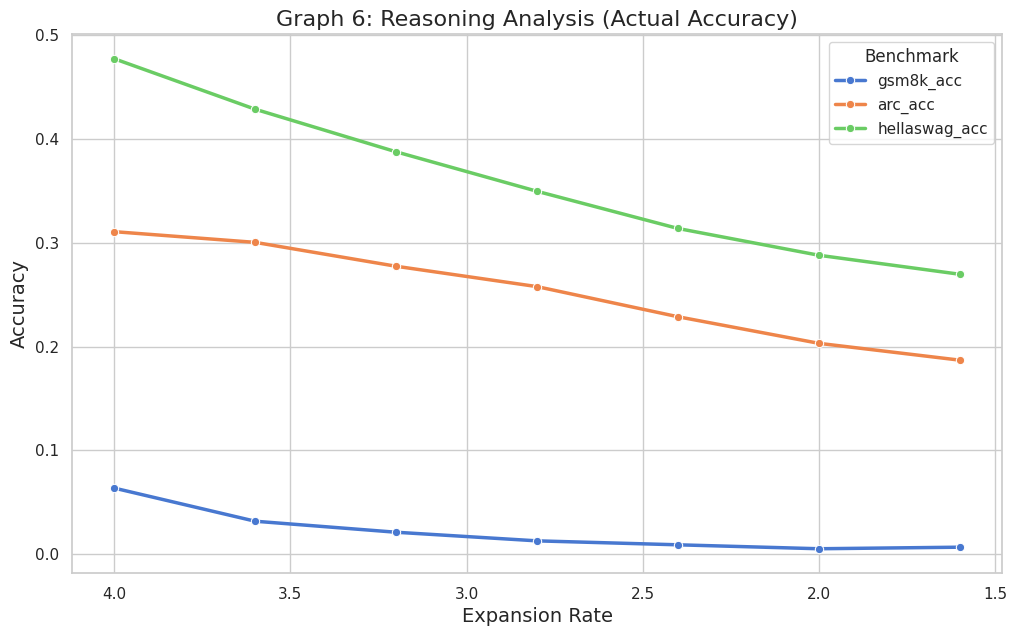

In [ ]:
# === Graph 6: Reasoning Analysis (Actual Accuracy) ===

df_reasoning = df.melt(id_vars=['expansion_rate'],
                         value_vars=['gsm8k_acc', 'arc_acc', 'hellaswag_acc'],
                         var_name='Benchmark',
                         value_name='Accuracy')

plt.figure(figsize=(12, 7))
ax = sns.lineplot(data=df_reasoning,
                  x='expansion_rate',
                  y='Accuracy',
                  hue='Benchmark',
                  marker='o',
                  linewidth=2.5)

ax.invert_xaxis()
ax.set_title('Graph 6: Reasoning Analysis (Actual Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Expansion Rate')
ax.legend(title='Benchmark')
plt.show()

**Graph 6: Reasoning Analysis (Actual Accuracy)**

This graph displays absolute accuracy scores for three reasoning-intensive benchmarks across different expansion rates, showing how mathematical and commonsense reasoning capabilities degrade under width pruning.

* **X-Axis (Expansion Rate):** Represents the MLP expansion ratio from 4.0 (baseline) to 1.5 (60% pruning).

* **Y-Axis (Accuracy):** Shows raw accuracy scores ranging from 0 to 0.5, representing the proportion of correct predictions.

The graph reveals differential vulnerability across reasoning types.

GSM8K (blue line) demonstrates extreme fragility, starting at baseline accuracy of 0.064 and declining rapidly to approximately 0.032 at expansion rate 3.6 (10% pruning), then collapsing to near-zero performance (0.005-0.007) by expansion rate 2.0 (50% pruning). This catastrophic degradation indicates that chain-of-thought mathematical reasoning is highly dependent on the knowledge representations removed by pruning.

ARC-Challenge (orange line) shows more gradual but sustained decline from 0.31 to 0.19, losing approximately 39% of baseline performance, suggesting moderate dependence on factual scientific knowledge.

HellaSwag (green line) exhibits the most resilience among these benchmarks, declining from 0.48 to 0.27, with relatively linear degradation that suggests commonsense inference relies on more robust pattern-matching mechanisms.

The three-fold separation in baseline performance (HellaSwag at 0.48, ARC at 0.31, GSM8K at 0.064) and the convergence toward similar absolute degradation magnitudes at high pruning levels suggest that these benchmarks engage different computational pathways with varying dependencies on MLP capacity. GSM8K's near-complete collapse contrasts sharply with the improvements observed in MUSR and IFEval (Graph 2), indicating that arithmetic reasoning and structured instruction-following rely on fundamentally different neural substrates within the model.

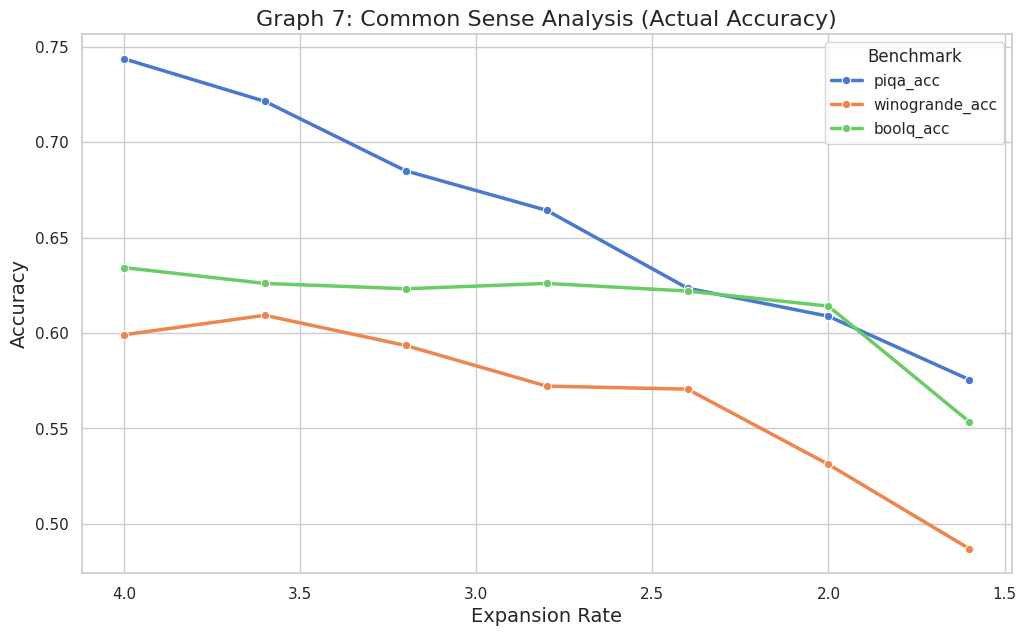

In [ ]:
# === Graph 7: Common Sense Analysis (Actual Accuracy) ===

df_commonsense = df.melt(id_vars=['expansion_rate'],
                           value_vars=['piqa_acc', 'winogrande_acc', 'boolq_acc'],
                           var_name='Benchmark',
                           value_name='Accuracy')

plt.figure(figsize=(12, 7))
ax = sns.lineplot(data=df_commonsense,
                  x='expansion_rate',
                  y='Accuracy',
                  hue='Benchmark',
                  marker='o',
                  linewidth=2.5)

ax.invert_xaxis()
ax.set_title('Graph 7: Common Sense Analysis (Actual Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Expansion Rate')
ax.legend(title='Benchmark')
plt.show()

**Graph 7: Common Sense Analysis (Actual Accuracy)**

This graph displays absolute accuracy scores for three common-sense reasoning benchmarks across different expansion rates, revealing distinct resilience patterns in how pruning affects different types of intuitive reasoning.

**X-Axis (Expansion Rate):** Represents the MLP expansion ratio from 4.0 (baseline) to 1.5 (60% pruning).

**Y-Axis (Accuracy):** Shows raw accuracy scores ranging from approximately 0.48 to 0.75, representing the proportion of correct predictions.

The graph reveals striking variation in benchmark resilience to width pruning. P

IQA (blue line) demonstrates the most dramatic degradation trajectory, starting at 0.744 baseline accuracy and declining relatively linearly to 0.575 at expansion rate 1.6, representing a 23% performance loss. This suggests that physical commonsense reasoning about everyday objects and actions has moderate dependence on the knowledge encoded in MLP weights.

BoolQ (green line) exhibits remarkable stability, maintaining accuracy between 0.62 and 0.635 across expansion rates 4.0 to 2.4, before experiencing sharp degradation to 0.553 at expansion rate 1.6. This plateau pattern followed by sudden collapse indicates a threshold effect where basic yes/no question answering remains robust until critical capacity is exceeded.

WinoGrande (orange line) shows an unusual non-monotonic trajectory with a slight improvement from 0.599 to 0.609 at expansion rate 3.6, followed by gradual decline to 0.487 at expansion rate 1.5.

The convergence of all three benchmarks toward similar performance levels (0.55-0.575) at expansion rate 1.6, despite starting from different baselines (0.599-0.744), suggests a common floor effect where multiple types of common-sense reasoning collapse toward chance-level performance under severe pruning.

The relative resilience of these benchmarks compared to knowledge-intensive tasks like MMLU and GSM8K (Graph 6) supports the hypothesis that common-sense reasoning relies more on pattern recognition and less on extensive factual retrieval from MLP-stored knowledge.

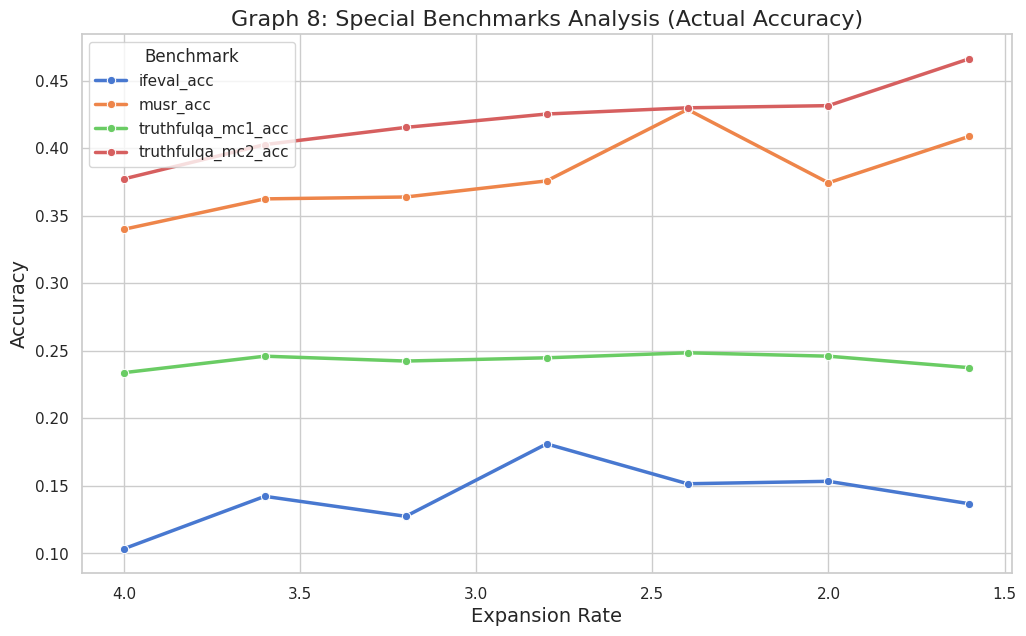

In [ ]:
# === Graph 8: Special Benchmarks Analysis (Actual Accuracy) ===
# This plot clearly shows the divergence between mc1 and mc2 for TruthfulQA

df_special = df.melt(id_vars=['expansion_rate'],
                     value_vars=['ifeval_acc', 'musr_acc', 'truthfulqa_mc1_acc', 'truthfulqa_mc2_acc'],
                     var_name='Benchmark',
                     value_name='Accuracy')

plt.figure(figsize=(12, 7))
ax = sns.lineplot(data=df_special,
                  x='expansion_rate',
                  y='Accuracy',
                  hue='Benchmark',
                  marker='o',
                  linewidth=2.5)

ax.invert_xaxis()
ax.set_title('Graph 8: Special Benchmarks Analysis (Actual Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Expansion Rate')
ax.legend(title='Benchmark')
plt.show()

**Graph 8: Special Benchmarks Analysis (Actual Accuracy)**

This graph displays absolute accuracy scores for four specialized benchmarks across expansion rates, revealing how truthfulness filtering, instruction following, and algorithmic reasoning respond to width pruning.

* **X-Axis (Expansion Rate):** Represents the MLP expansion ratio from 4.0 (baseline) to 1.5 (60% pruning).

* **Y-Axis (Accuracy):** Shows raw accuracy scores ranging from approximately 0.10 to 0.47, representing the proportion of correct predictions.

The graph demonstrates divergent trajectories that distinguish improved capabilities from stable or degraded ones.

TruthfulQA MC2 (red line) shows consistent improvement from baseline 0.377 to 0.466 at expansion rate 1.5, representing a 24% gain with monotonic growth across all pruning levels. This pattern suggests that pruning removes neurons encoding false or misleading information, thereby enhancing the model's ability to select truthful responses.

MUSR (orange line) exhibits improvement from 0.340 to 0.409 with a notable dip at expansion rate 2.0 (0.374), indicating that algorithmic reasoning benefits from moderate pruning but shows some instability at specific capacity levels.

IFEval (blue line) displays non-monotonic behavior, rising from baseline 0.104 to a peak of 0.180 at expansion rate 2.8 (73% improvement), then stabilizing around 0.153-0.155 for expansion rates 2.5-1.5. This trajectory indicates that instruction-following capabilities are substantially enhanced by pruning, though the optimal improvement occurs at moderate pruning levels.

TruthfulQA MC1 (green line) maintains remarkable stability, fluctuating only between 0.234 and 0.249 across all expansion rates, suggesting that single-answer truthfulness judgment relies on robust mechanisms largely independent of MLP capacity.

The contrast between these improving or stable metrics and the catastrophic degradation observed in knowledge-intensive tasks (Graphs 1, 5, 6) provides strong evidence for the pruning dichotomy hypothesis: width pruning selectively impairs memorized knowledge while preserving or enhancing capabilities dependent on constraint satisfaction and noise filtering.


## 📊  **Session Summary: Benchmark and Capability Analysis (1B)**

This notebook has visualized the benchmark evaluation results for the pruned Llama-3.2-1B models, loaded from `llama_1b_complete_results_latest.json`. The analysis focused on the **"Selective Capacity Erosion"** hypothesis: the idea that pruning (reducing the `expansion_rate`) causes a trade-off, where fragile capabilities like long-chain reasoning collapse, while other robust reasoning capabilities are maintained or even improve.

The key findings from the graphs are as follows:

**1. The Capability Trade-off: Confirmed**
The analysis validates the central hypothesis:
* **Cost (Fragile Capabilities):** The average score of fragile benchmarks (`Fragile_Avg`), which includes `gsm8k`, `wikitext_ppl`, and `lambada_ppl`, shows a rapid collapse as the `expansion_rate` is reduced.
* **Benefit (Robust Capabilities):** The average score of robust benchmarks (`Robust_Avg`), including `ifeval_acc`, `musr_acc`, and `truthfulqa_mc2_acc`, not only remains stable but consistently **improves** upon the baseline, peaking at more aggressive pruning levels.
* **Graph 3** visualizes this trade-off directly, showing the two metric groups (Fragile in red, Robust in green) clearly diverging.

**2. The Collapse of Fragile Capabilities**
* **Long-Chain Reasoning is Brittle:** The most significant finding is the catastrophic degradation of **`gsm8k_acc`** (mathematical reasoning). **Graph 1** and **Graph 7** show this capability is almost completely eroded with only 20% pruning (expansion rate ~3.2).
* **General Knowledge Degrades:** Perplexity metrics (`wikitext_ppl`, `lambada_ppl`) show a similar, though less severe, collapse, indicating an erosion of general knowledge and predictive ability (**Graph 5**).
* **Commonsense is Resilient:** In contrast, commonsense reasoning benchmarks (`hellaswag_acc`, `winogrande_acc`) are highly resilient, showing minimal performance loss until pruning becomes extreme (40% or more), as seen in **Graph 4** and **Graph 7**.

**3. The Improvement of Robust Capabilities**
* **Reasoning Improves with Pruning:** **Graph 2** provides the core evidence for the "improvement" side of the hypothesis. Benchmarks for instruction-following (`ifeval_acc`) and multi-step reasoning (`musr_acc`) both show a clear *increase* in performance, peaking well above the baseline at expansion rates between 2.8 and 1.6.
* This suggests that reducing the model's capacity via pruning may enhance its ability to focus on complex, learned reasoning patterns by removing parameter space dedicated to rote knowledge.

**4. The "Null Result": TruthfulQA Divergence**
* **Graph 8** provides a crucial insight by comparing the two TruthfulQA benchmarks. **`truthfulqa_mc1_acc`** (which primarily measures a model's tendency to select *true* statements) remains almost perfectly flat, regardless of pruning.
* However, **`truthfulqa_mc2_acc`** (which measures both truthfulness and knowledge) *improves* with pruning, following the same trend as other robust reasoning tasks like `ifeval` and `musr`. This reinforces the idea that pruning selectively erodes knowledge while preserving, or even enhancing, abstract reasoning.

**Session Conclusion**
Pruning Llama-3.2-1B by reducing the `expansion_rate` reveals a clear **selective capacity erosion**. This method significantly degrades general knowledge (`PPL`) and catastrophically erodes fragile, long-chain reasoning (`gsm8k`). However, this cost is met with an unexpected benefit: a measurable **improvement** in robust, instruction-based reasoning (`ifeval`, `musr`). This supports the hypothesis that pruning does not just degrade the model; it fundamentally alters its capabilities, trading rote knowledge for enhanced reasoning.